In [126]:
import time
import datetime
from datetime import date

%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import *
import urllib.request
import re
from dateutil.rrule import rrule, DAILY

In [16]:
start_date = date(2016, 1, 1)
end_date = date(2016, 6, 30)
day = 24 * 3600
#start_time = int(time.mktime(datetime.datetime.strptime(start_date, "%Y-%m-%d").timetuple())) + int(day/2)
#start_time

### Retrieve Exchange Rates from Raiffeisen

In [83]:
rex = re.compile(r"""<td class="ri">Kurs:</td>
    								<td><strong>(.+)</strong></td>""")

In [92]:
def get_rate(timestamp):
    url = 'http://gisweb.vwd.com/mel/devisen_rechner.htn?u=112&version=2&zeit={}&AusgangsWaehrung=978&Menge=1&ZielWaehrung=756'
    #print(url.format(int(timestamp)))
    response = urllib.request.urlopen(url.format(int(timestamp)))
    data = response.read()     # a `bytes` object
    html = data.decode('latin-1')
    res = rex.search(html)
    kurs = float(res.group(1).replace(",", "."))
    return kurs

In [93]:
rates = []
for dt in rrule(DAILY, dtstart=start_date, until=end_date):
    timestamp = dt.timestamp()
    rate = get_rate(timestamp+ day/2)
    print(dt.isoformat(), dt.timestamp(), rate)
    rates.append((timestamp, rate))
    time.sleep(1)
    


2016-01-01T00:00:00 1451602800.0 1.0873
2016-01-02T00:00:00 1451689200.0 1.0873
2016-01-03T00:00:00 1451775600.0 1.0873
2016-01-04T00:00:00 1451862000.0 1.0854
2016-01-05T00:00:00 1451948400.0 1.0846
2016-01-06T00:00:00 1452034800.0 1.0858
2016-01-07T00:00:00 1452121200.0 1.0857
2016-01-08T00:00:00 1452207600.0 1.0874
2016-01-09T00:00:00 1452294000.0 1.0874
2016-01-10T00:00:00 1452380400.0 1.0874
2016-01-11T00:00:00 1452466800.0 1.0879
2016-01-12T00:00:00 1452553200.0 1.0877
2016-01-13T00:00:00 1452639600.0 1.095
2016-01-14T00:00:00 1452726000.0 1.0919
2016-01-15T00:00:00 1452812400.0 1.0933
2016-01-16T00:00:00 1452898800.0 1.0933
2016-01-17T00:00:00 1452985200.0 1.0933
2016-01-18T00:00:00 1453071600.0 1.0947
2016-01-19T00:00:00 1453158000.0 1.0951
2016-01-20T00:00:00 1453244400.0 1.0941
2016-01-21T00:00:00 1453330800.0 1.0954
2016-01-22T00:00:00 1453417200.0 1.0972
2016-01-23T00:00:00 1453503600.0 1.0972
2016-01-24T00:00:00 1453590000.0 1.0972
2016-01-25T00:00:00 1453676400.0 1.099
20

In [94]:
len(rates)

182

In [95]:
rates[:3]

[(1451602800.0, 1.0873), (1451689200.0, 1.0873), (1451775600.0, 1.0873)]

In [97]:
with open("./raiffeisen.tsv", 'w') as table:
    for ts, rate in rates:
        table.write("{} {}\n".format(ts, rate))

## Compare Rates

In [156]:
# Load raiffeisen
raiffeisen = []
with open("./raiffeisen.tsv") as table:
    for line in table.readlines():
        ratetime, rate = line.split()
        ratetime = int(float(ratetime))
        rate = float(rate)
        raiffeisen.append((ratetime, 1/rate)) 

In [157]:
raiffeisen_df = pd.DataFrame(raiffeisen)
raiffeisen_df.columns = ("time", "raiba")

In [158]:
# Load commerzbank 
commerzbank_geld = []
commerzbank_brief = []
with open("./commerzbank.csv") as csv: 
    for line in csv.readlines():
        ratetime, _, geld, brief = line.split(",")[:4]
        timestamp = int(time.mktime(datetime.datetime.strptime(ratetime, "%d.%m.%Y").timetuple()))
        commerzbank_geld.append((timestamp, 1/float(geld)))
        commerzbank_brief.append((timestamp, 1/float(brief)))

In [159]:
commerzbank_geld_df = pd.DataFrame(commerzbank_geld)
commerzbank_brief_df = pd.DataFrame(commerzbank_brief)
commerzbank_geld_df.columns = ("time", "com_geld")
commerzbank_brief_df.columns = ("time", "com_brief")

In [160]:
commerzbank_geld_df

,time,com_geld
0,1451862000,0.919456
1,1451948400,0.922424
2,1452034800,0.924129
3,1452121200,0.921744
4,1452207600,0.922679
5,1452466800,0.922679
6,1452553200,0.922765
7,1452639600,0.918864
8,1452726000,0.914578
9,1452812400,0.914495


In [161]:
raiffeisen_df

,time,raiba
0,1451602800,0.919709
1,1451689200,0.919709
2,1451775600,0.919709
3,1451862000,0.921319
4,1451948400,0.921999
5,1452034800,0.920980
6,1452121200,0.921065
7,1452207600,0.919625
8,1452294000,0.919625
9,1452380400,0.919625


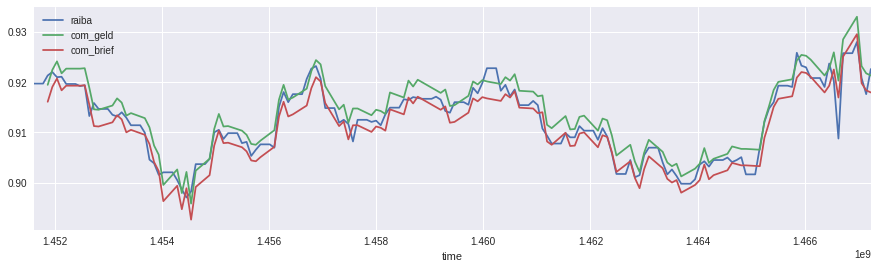

In [162]:
fig, ax = subplots(figsize = (15,4 ))
raiffeisen_df.plot(x= "time", y = "raiba", ax = ax)
commerzbank_geld_df.plot(x="time", y= "com_geld", ax = ax)
commerzbank_brief_df.plot(x="time", y= "com_brief", ax = ax)

In [171]:
commerzbank_geld_df["com_geld"] - commerzbank_brief_df["com_brief"]

0      0.003369
1      0.003391
2      0.003403
3      0.003386
4      0.003393
5      0.003393
6      0.003393
7      0.003365
8      0.003334
9      0.003333
10     0.003339
11     0.003350
12     0.003343
13     0.003325
14     0.003328
15     0.003321
16     0.003308
17     0.003281
18     0.003268
19     0.003225
20     0.003247
21     0.003213
22     0.003244
23     0.003198
24     0.003245
25     0.003262
26     0.003305
27     0.003327
28     0.003309
29     0.003309
         ...   
97     0.003237
98     0.003248
99     0.003255
100    0.003278
101    0.003256
102    0.003262
103    0.003269
104    0.003280
105    0.003278
106    0.003277
107    0.003277
108    0.003275
109    0.003317
110    0.003338
111    0.003362
112    0.003374
113    0.003377
114    0.003405
115    0.003413
116    0.003412
117    0.003406
118    0.003383
119    0.003393
120    0.003417
121    0.003375
122    0.003436
123    0.003469
124    0.003397
125    0.003386
126    0.003383
dtype: float64

In [172]:
raiba_filtered = raiffeisen_df.loc[raiffeisen_df['time'].isin(commerzbank_brief_df['time'])]
raiba_filtered = raiba_filtered.reset_index()

In [173]:
diff = raiba_filtered['raiba'] - commerzbank_brief_df["com_brief"]

In [174]:
diff.mean()

0.0013799000604823373